Задание
Вопросы по заданию
Преподаватель: Олег Булыгин
Домашнее задание http://prntscr.com/ujddtw

1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness

Дополнительно будет выложен в ЛК
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Корреляция (для всех групп)

In [96]:
data = pd.read_csv('water.csv')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [98]:
dataset = data[['mortality','hardness']].sort_values('mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

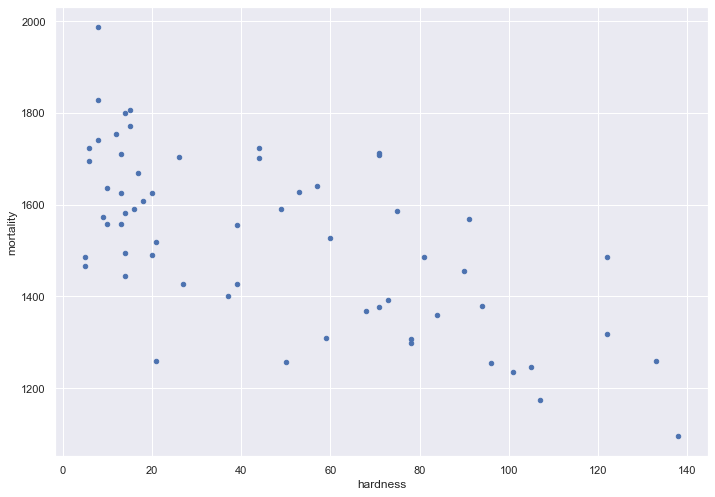

In [99]:
dataset.plot(kind= 'scatter', y= 'mortality', x= 'hardness', )

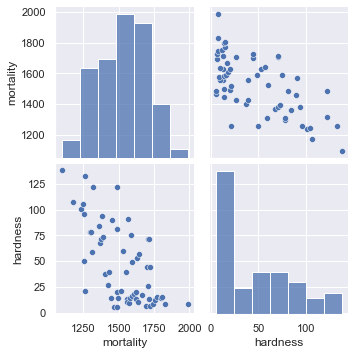

In [100]:
sns.pairplot(dataset)

In [101]:
dataset.corr(method= 'pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [102]:
dataset.corr(method= 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [103]:
dataset.corr(method= 'kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


<AxesSubplot:>

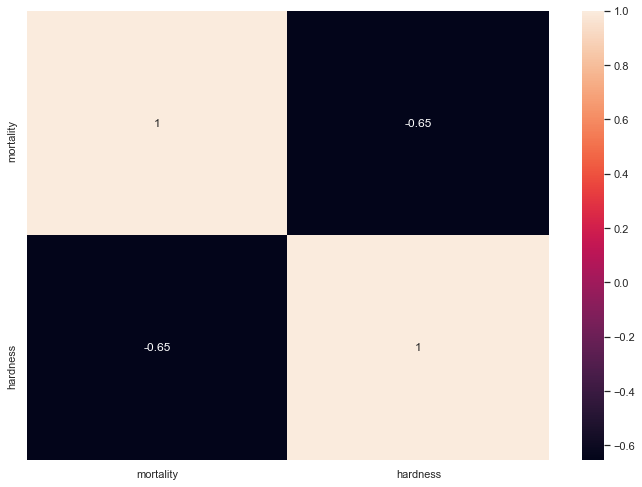

In [104]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(dataset.corr(), annot=True)

# Вывод: статистически определена средняя отрицательная связь между жесткостью воды и смертностью:
# коэффициент корреляции  -0.65 (Пирсон), -0.63 (Спирмен).

# 2. Регрессия

In [204]:
X = dataset[['hardness']]
y = dataset['mortality']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [206]:
X_train.shape

(42, 1)

In [207]:
y_train.shape

(42,)

In [208]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [209]:
model.coef_

array([-2.82202028])

In [210]:
model.intercept_

1664.010090076483

In [211]:
y_pred = model.predict(X_test)
y_pred

array([1274.57129132, 1522.90907603, 1647.07796839, 1627.32382643,
       1472.11271098, 1630.14584671, 1638.61190755, 1463.64665014,
       1426.96038649, 1607.56968446, 1407.20624452, 1641.43392783,
       1458.00260957, 1367.69796059, 1647.07796839, 1559.59533969,
       1443.89250817, 1288.68139272, 1627.32382643])

In [212]:
model.score(X_test, y_test) #метод возвращает коэффициент детерминации

0.5729023538627018

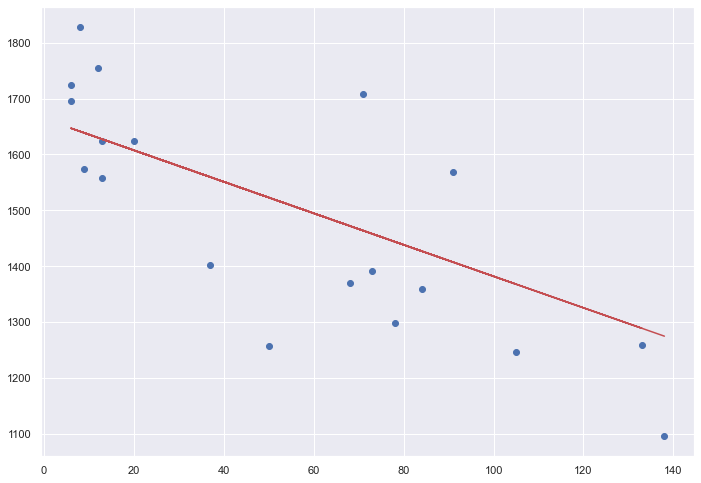

In [213]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

# Результаты: 1) построена модель линейной регрессии (Y=-2.82*X + 1664); 2) коэффициент детерминации = 0,57; построен график остатков. По полученным результатам можно сделать вывод, что модель , в целом, адекватна.

# 3. Корреляция и регрессия для разных групп (южные и северные районы)

In [214]:
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [215]:
dataS = data[data['location'] == 'South']
dataS1 = dataS[['mortality', 'hardness']].sort_values('mortality')
dataS1.head() # получена выборка для южных районов городов

,mortality,hardness
25,1096,138
37,1175,107
41,1236,101
0,1247,105
14,1254,96


In [216]:
dataN = data[data['location'] == 'North']
dataN1 = dataN[['mortality', 'hardness']].sort_values('mortality')
dataN1.head() # получена выборка для северных районов городов

,mortality,hardness
60,1378,71
21,1379,94
35,1427,27
17,1428,39
43,1444,14


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

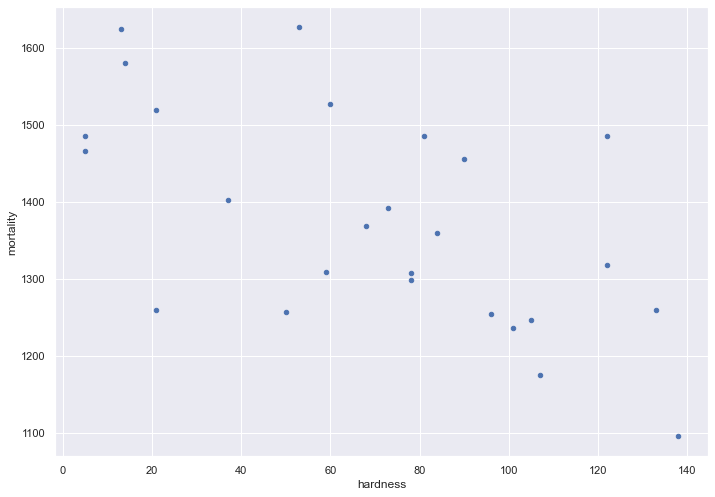

In [217]:
# скаттер-плот для "юга"
dataS1.plot(kind= 'scatter', y= 'mortality', x= 'hardness')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

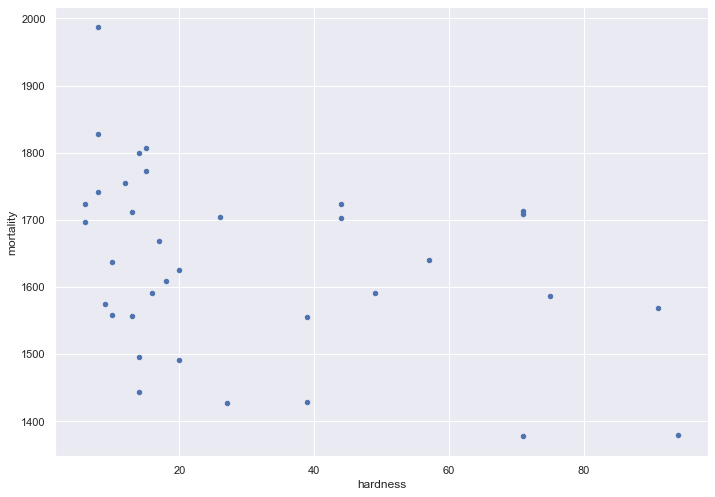

In [218]:
# скаттер-плот для "севера"
dataN1.plot(kind= 'scatter', y= 'mortality', x= 'hardness')

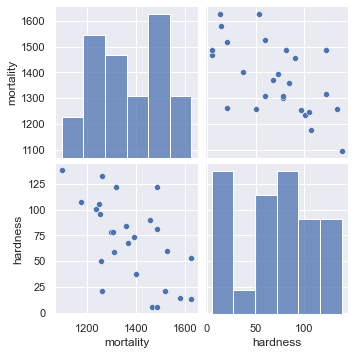

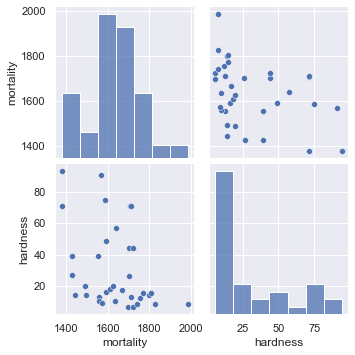

In [219]:
sns.pairplot(dataS1)
sns.pairplot(dataN1)

# на севере и на юге разное распределение жесткости воды по смертности (на севере вода мягче, на юге более жесткая)

In [220]:
dataS1.corr(method= 'pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [221]:
dataN1.corr(method= 'pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


# коэффициент корреляции Пирсона для Юга = -0,60; для Севера = -0,36.

In [222]:
dataS1.corr(method= 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [223]:
dataN1.corr(method= 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


# коэффициент корреляции Cпирмена для Юга = -0,59; для Севера = -0,40.

In [224]:
dataS1.corr(method= 'kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [225]:
dataN1.corr(method= 'kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


# коэффициент корреляции Кендэлла для Юга = -0,44; для Севера = -0,28.

In [226]:
# регрессия для южных районов
X1 = dataS1[['hardness']]
y1 = dataS1['mortality']

In [227]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [228]:
X_train1.shape

(18, 1)

In [229]:
y_train1.shape

(18,)

In [230]:
model = LinearRegression()
model.fit(X_train1, y_train1)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [231]:
model.coef_

array([-1.43610493])

In [232]:
model.intercept_

1486.6909733586438

In [233]:
y_pred1 = model.predict(X_test1)
y_pred1

array([1374.6747889 , 1357.44152975, 1288.50849316, 1468.02160928,
       1311.48617202, 1374.6747889 , 1389.03583819, 1333.02774596])

In [234]:
model.score(X_test1, y_test1) #метод возвращает коэффициент детерминации

0.42035143105910544

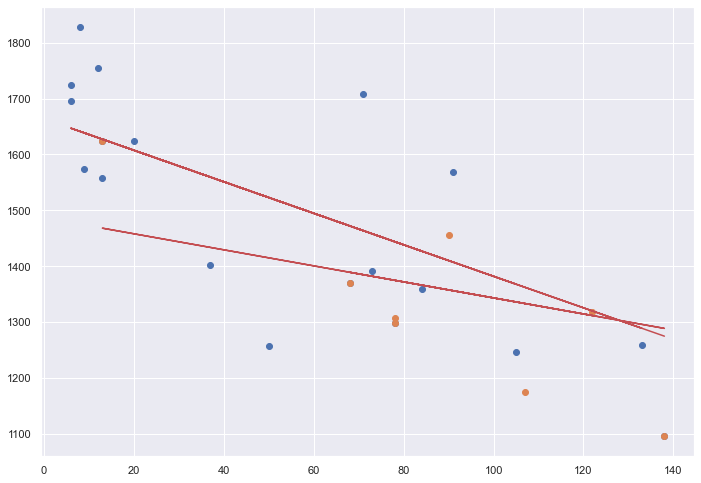

In [237]:
plt.scatter(X_test, y_test)
plt.scatter(X_test1, y_test1)
plt.plot(X_test, y_pred, c='r')
plt.plot(X_test1, y_pred1, c='r')

# Для южных районов городов регрессионная модель вида Y=-1.43 + 1486, коэффициент детерминации = 0,42, остатки представлены на графике. Модель соответствует модели без учета разделения по группам. Можно сделать вывод о наличии статистической связи (слабая, отрицательная) между жесткостью воды и смертностью.

In [238]:
# регрессия для северных районов
X2 = dataN1[['hardness']]
y2 = dataN1['mortality']

In [239]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [240]:
X_train2.shape

(24, 1)

In [241]:
y_train2.shape

(24,)

In [242]:
model = LinearRegression()
model.fit(X_train2, y_train2)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [243]:
model.coef_

array([-2.31336077])

In [244]:
model.intercept_

1700.94613401545

In [245]:
y_pred2 = model.predict(X_test2)
y_pred2

array([1599.15826016, 1587.59145631, 1670.87244401, 1599.15826016,
       1659.30564016, 1673.18580478, 1661.61900093, 1527.4440763 ,
       1670.87244401, 1654.67891863, 1677.81252632])

In [247]:
model.score(X_test2, y_test2) #метод возвращает коэффициент детерминации

-0.3820604801632306

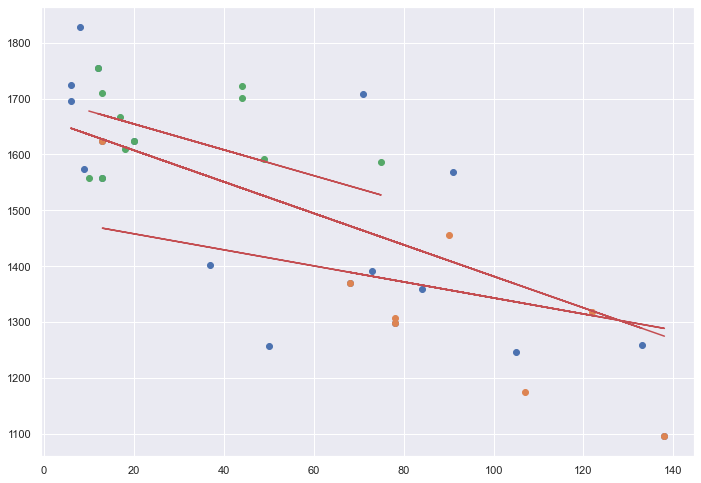

In [248]:
plt.scatter(X_test, y_test)
plt.scatter(X_test1, y_test1)
plt.scatter(X_test2, y_test2)
plt.plot(X_test, y_pred, c='r')
plt.plot(X_test1, y_pred1, c='r')
plt.plot(X_test2, y_pred2, c='r')

# Для северных районов городов регрессионная модель вида Y=-2,31 + 1700, коэффициент детерминации = 0,38, остатки представлены на графике. Модель соответствует модели без учета разделения по группам. Можно сделать вывод о наличии статистической связи (слабая, отрицательная) между жесткостью воды и смертностью.

# Окончательный вывод: существует слабая отрицательная статистическая связь между жесткостью воды и смертностью (как для отдельных районов городов, так и для городов в целом)